# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [10]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.head(5)

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [13]:
df['國文']

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [14]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

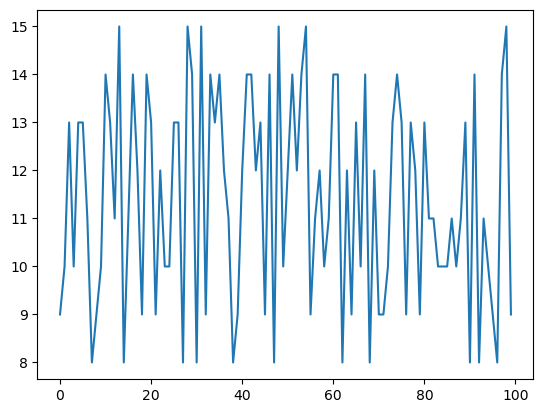

In [15]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

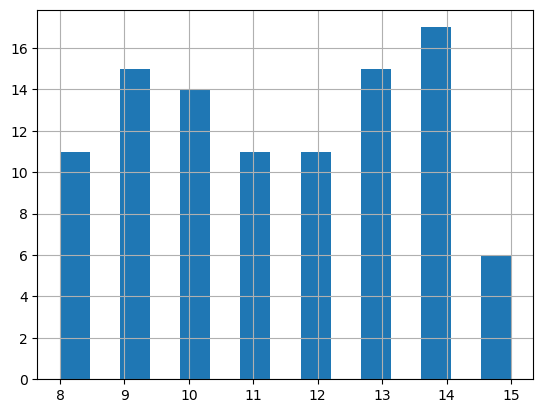

In [16]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [17]:
df.國文.mean()

11.39

算標準差。

In [18]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [19]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [20]:
df.corr()

/var/folders/j9/3gkxp4hj16gd_sl16dpqrzy40000gn/T/ipykernel_50418/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [21]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [22]:
df['總級分'] = df.sum(axis = 1)
df.head()

/var/folders/j9/3gkxp4hj16gd_sl16dpqrzy40000gn/T/ipykernel_50418/785932953.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['總級分'] = df.sum(axis = 1)


,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64


## 【技巧】

有計算的當然也可以的。

In [23]:
df['加權'] = df.國文+df.英文+df.數學*2

In [24]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
1,胡玉華,10,10,10,8,9,47,40
2,黃淑婷,13,15,8,11,14,61,44
3,陳上紫,10,10,8,9,14,51,36
4,崔靜成,13,12,14,12,13,64,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [25]:
df.sort_values(by = '數學',ascending = False).head(10)


,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57,49
83,李士賢,10,14,15,13,13,65,54
36,詹威德,12,13,15,10,14,64,55
37,曾怡君,11,12,15,13,14,65,53
39,段冠廷,9,8,15,12,15,59,47
59,芮秋辛,11,10,15,10,8,54,51
67,林哲法,14,9,15,10,14,62,53
73,吳志遠,13,15,15,8,8,59,58
76,周育霖,9,12,15,13,12,61,51
70,葉儀依,9,13,15,8,14,59,52


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [26]:
df2 = df.sort_values(by = ['加權','總級分'],ascending = False).head(10)

### 【重點】重設 index

In [27]:
df2.index = range(1,101)
df2.head()

ValueError: Length mismatch: Expected axis has 10 elements, new values have 100 elements

## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [28]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59,58
36,詹威德,12,13,15,10,14,64,55
83,李士賢,10,14,15,13,13,65,54
37,曾怡君,11,12,15,13,14,65,53
67,林哲法,14,9,15,10,14,62,53


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [29]:
df2.drop('總級分', axis = 1)

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
44,童心怡,13,13,14,8,13,54
37,曾怡君,11,12,15,13,14,53
48,陳怡婷,15,14,12,9,15,53
4,崔靜成,13,12,14,12,13,53
67,林哲法,14,9,15,10,14,53


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [30]:
df2.drop('總級分', axis=1,inplace=True)
df2

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
83,李士賢,10,14,15,13,13,54
44,童心怡,13,13,14,8,13,54
37,曾怡君,11,12,15,13,14,53
48,陳怡婷,15,14,12,9,15,53
4,崔靜成,13,12,14,12,13,53
67,林哲法,14,9,15,10,14,53


### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [31]:
df2.drop(5).head()

KeyError: '[5] not found in axis'

In [ ]:
df2.drop(5).head()

### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [35]:


df2[df2.姓名=='李士賢']

,姓名,國文,英文,數學,自然,社會,加權
83,李士賢,10,14,15,13,13,54


In [36]:
df2.drop(df2[df2.姓名=='李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
73,吳志遠,13,15,15,8,8,58
57,胡淳茜,12,15,14,13,11,55
36,詹威德,12,13,15,10,14,55
25,蔡亦瑄,13,13,14,13,12,54
44,童心怡,13,13,14,8,13,54
37,曾怡君,11,12,15,13,14,53
48,陳怡婷,15,14,12,9,15,53
4,崔靜成,13,12,14,12,13,53
67,林哲法,14,9,15,10,14,53


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [46]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('AAPL')

ModuleNotFoundError: No module named 'pandas_datareader'

In [47]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [48]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,30.447144,30.478571,30.080000,30.104286,26.986492,88102700
2010-01-04,30.490000,30.642857,30.340000,30.572857,27.406532,123432400
2010-01-05,30.657143,30.798571,30.464285,30.625713,27.453915,150476200
2010-01-06,30.625713,30.747143,30.107143,30.138571,27.017223,138040000
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.967278,119282800


#### 只要最後 300 個交易日!

In [49]:
df = df[-300:]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-10-03,112.709999,113.050003,112.279999,112.519997,110.173546,21701800
2016-10-04,113.059998,114.309998,112.629997,113.000000,110.643539,29736800
2016-10-05,113.400002,113.660004,112.690002,113.050003,110.692505,21453100
2016-10-06,113.699997,114.339996,113.129997,113.889999,111.514984,28779300
2016-10-07,114.309998,114.559998,113.510002,114.059998,111.681435,24358400
...,...,...,...,...,...,...
2017-12-04,172.479996,172.619995,169.630005,169.800003,169.800003,32542400
2017-12-05,169.059998,171.520004,168.399994,169.639999,169.639999,27350200
2017-12-06,167.500000,170.199997,166.460007,169.009995,169.009995,28560000


#### 20 日的移動平均

Date
2016-10-03           NaN
2016-10-04           NaN
2016-10-05           NaN
2016-10-06           NaN
2016-10-07           NaN
                 ...    
2017-12-04    172.694001
2017-12-05    172.463501
2017-12-06    172.173501
2017-12-07    171.827501
2017-12-08    171.502000
Name: Close, Length: 300, dtype: float64

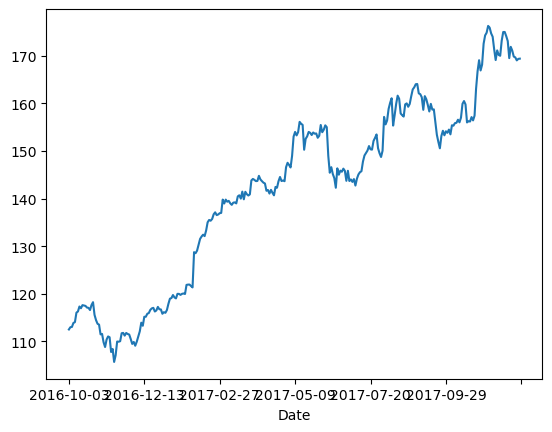

In [51]:
df.Close.plot()
df.Close.rolling(20).mean()

<AxesSubplot:xlabel='Date'>

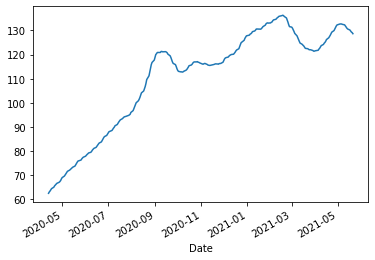

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

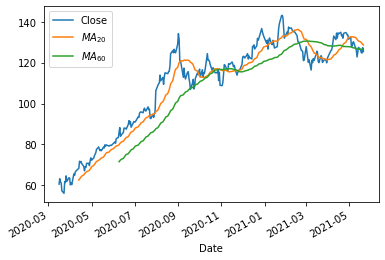

In [68]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [54]:
close = df.Close.values

len(close)

300

In [56]:
x = close[:-1]
x
len(x)

299

In [62]:
y = close[1:]
len(y)

299

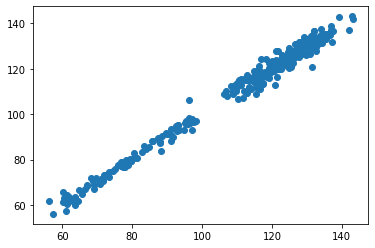

In [81]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [63]:
mydata = np.random.randn(4,3)

array([[-2.55231259,  1.90682379, -0.20156659],
       [ 1.01709617, -0.03222475, -0.37933992],
       [-0.25137135,  1.02654615,  2.26766347],
       [-0.06883999, -0.61168607,  0.17414026]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [65]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [66]:
df2

,A,B,C
0,0.067756,0.681611,0.932405
1,-0.269167,0.332745,0.236164
2,-1.869300,0.558397,0.614756
3,-0.657213,0.807520,-0.868792


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [68]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [69]:
df3

,A,B,C
0,1.557262,0.898095,-1.473754
1,0.112633,-0.339266,-0.722448
2,-2.100417,-1.347649,-0.166920


In [70]:
df4 = pd.concat([df2,df3],axis=0)

In [71]:
df4

,A,B,C
0,0.067756,0.681611,0.932405
1,-0.269167,0.332745,0.236164
2,-1.869300,0.558397,0.614756
3,-0.657213,0.807520,-0.868792
0,1.557262,0.898095,-1.473754
1,0.112633,-0.339266,-0.722448
2,-2.100417,-1.347649,-0.166920


前面我們弄得亂七八糟的 index 重設一下。

In [73]:
df4.index = range(7)

In [74]:
df4

,A,B,C
0,0.067756,0.681611,0.932405
1,-0.269167,0.332745,0.236164
2,-1.869300,0.558397,0.614756
3,-0.657213,0.807520,-0.868792
4,1.557262,0.898095,-1.473754
5,0.112633,-0.339266,-0.722448
6,-2.100417,-1.347649,-0.166920


#### 横向的貼

In [77]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [78]:
df5

,A,B,C,A,B,C
0,0.067756,0.681611,0.932405,1.557262,0.898095,-1.473754
1,-0.269167,0.332745,0.236164,0.112633,-0.339266,-0.722448
2,-1.869300,0.558397,0.614756,-2.100417,-1.347649,-0.166920
3,-0.657213,0.807520,-0.868792,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [80]:
df_names = pd.read_csv('data/names.csv',names = ['姓名'])

In [81]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [84]:
df_names

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮
...,...
95,陳君生
96,曾桂甫
97,林欣怡
98,林佳霖


,Unnamed: 0,國文,英文,數學,社會,自然
0,0,12,6,6,8,12
1,1,10,6,13,13,6
2,2,11,14,13,13,11
3,3,10,13,13,14,12
4,4,8,13,14,9,13
...,...,...,...,...,...,...
95,95,11,9,13,14,10
96,96,14,9,12,11,9
97,97,15,8,13,14,14
98,98,8,11,9,7,10


In [174]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [90]:
df_grades.to_csv('data/grade2.csv',index=0)

In [91]:
df_x = pd.concat([df_names,df_grades],axis=1)

In [92]:
df_x

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,12,6,14,6,6
1,王紹尹,11,10,13,15,14
2,黃季坤,10,6,15,11,7
3,許正書,9,12,14,7,6
4,張鈞蓮,7,15,10,9,12
...,...,...,...,...,...,...
95,陳君生,12,15,10,6,11
96,曾桂甫,11,15,15,13,7
97,林欣怡,11,15,8,11,11
98,林佳霖,14,7,10,15,9
